## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [2]:
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")
df = pd.read_csv(path + "/amz_uk_price_prediction_dataset.csv")

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [3]:
# 1.
category_frequency = df["category"].value_counts()
top_5_categories = category_frequency.sort_values(ascending=False).head(5)
display(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

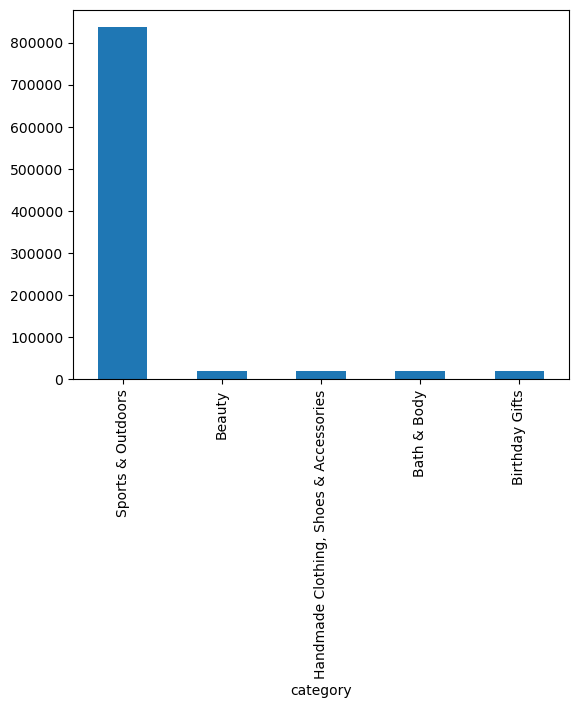

In [4]:
# 2a.
top_5_categories.head(25).plot(kind='bar');

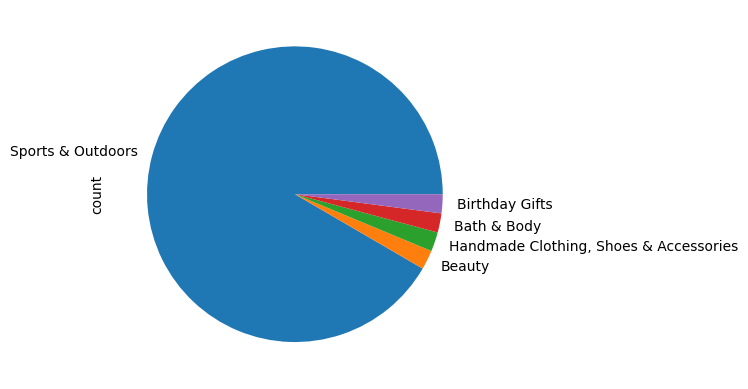

In [5]:
# 2b.
top_5_categories.plot(kind='pie');

### Part 2: Delving into Product Pricing


**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [6]:
def mean_median_mode(field):
    return field.mean(), field.median(), field.mode()[0]

def variance_std_range(field):
	return field.var(), field.std(), field.max() - field.min()

def kurtosis_skew(field):
	return field.kurtosis(), field.skew()

In [7]:
# 1.
print("Mean, median, mode for price:", mean_median_mode(df["price"]))
# The average price point is much higher than the median and mode.

Mean, median, mode for price: (89.24380943923663, 19.09, 9.99)


In [8]:
# 2.
print("Variance, standard deviation, range for price:", variance_std_range(df["price"]))
print("Kurtosis, skew for price:", kurtosis_skew(df["price"]))
# The price distribution is positively skewed, with a long tail on the right.

Variance, standard deviation, range for price: (119445.48532256528, 345.60886175352226, 100000.0)
Kurtosis, skew for price: (4241.616412866518, 27.492977566280338)


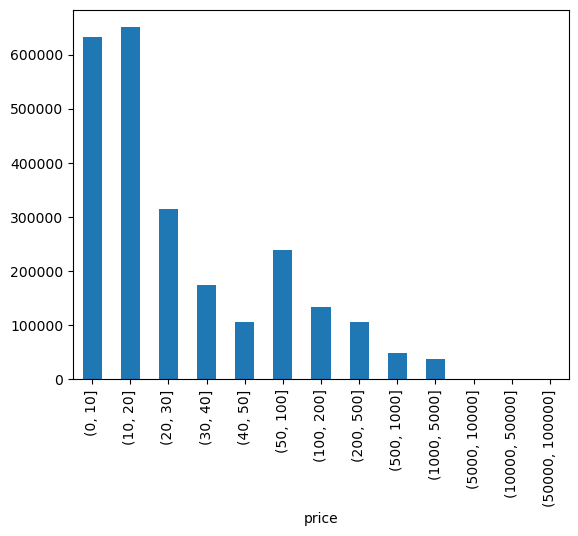

In [28]:
df_price = pd.cut(df["price"], bins=[0, 10, 20, 30, 40, 50, 100, 200, 500, 1000, 5000, 10000, 50000, 100000]).value_counts().sort_index()
df_price.plot(kind='bar');
# The histogram is hard to read because the price range is too large. We can solve this by cutting the data into smaller bins.

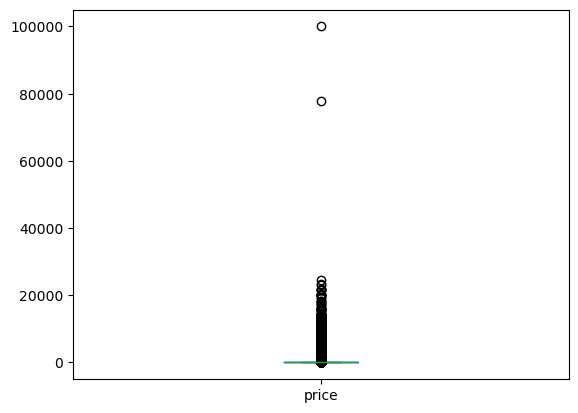

In [30]:
df["price"].plot(kind='box');
# There are outliers at 80000 and 100000. The box plot is hard to read because the price range is too large.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings.

In [33]:
# 1.
print("Mean, median, mode for stars:", mean_median_mode(df["stars"]))
# It is hard to tell because a lot of the values are 0 which represents missing data, that's why the mean is so low.

Mean, median, mode for stars: (2.152836472966065, 0.0, 0.0)


In [35]:
# 2.
print("Variance, standard deviation, range for stars:", variance_std_range(df["stars"]))
# Values are varied, with a large range.

Variance, standard deviation, range for stars: (4.81743402976196, 2.1948653785054697, 5.0)


In [37]:
# 3.
print("Kurtosis, skew for stars:", kurtosis_skew(df["stars"]))
# The distribution is negatively skewed, with a long tail on the left.

Kurtosis, skew for stars: (-1.9260061280432985, 0.08120735761080985)


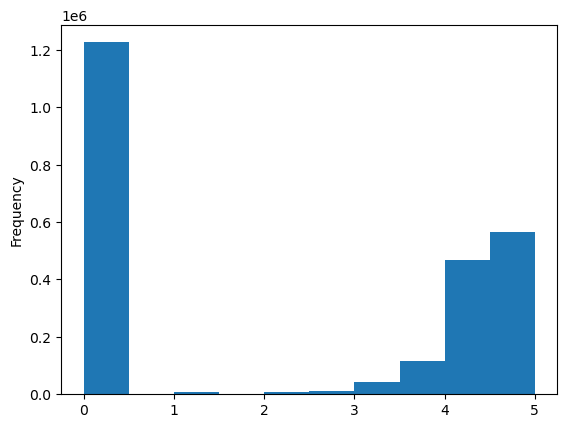

In [41]:
# 4.
df["stars"].plot(kind='hist');
# 0 is the most common value, which represents missing data.